# Feature Engineering and EDA

In [357]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import config
import urllib.request
from bs4 import BeautifulSoup as BS
import re

### Scrape Celebrity Bookclubs

We'll scrape books that appear on Reese Witherspoon's book club list.

In [6]:
reesebooks=[]

url = 'https://www.barnesandnoble.com/b/books/book-club-selections/reese-witherspoons-book-club/_/N-29Z8q8Z2qxw?Nrpp=40&page=1'
resp = urllib.request.urlopen(url)
soup = BS(resp, from_encoding=resp.info().get_param('charset'))
for info in soup.find_all(class_='product-shelf-title product-info-title pt-xs'):
    book = info.get_text(strip=True)
    reesebooks.append(book)


We'll scrape books that appear on Oprah's book club list.

In [7]:
oprahbooks=[]

for page in range(0,7):
    url = f'https://www.barnesandnoble.com/b/books/book-club-selections/oprahs-book-club/_/N-1fZ29Z8q8Z1qld?Nrpp=40&Ns=P_Publication_Date%7C1&page={page}#'
    resp = urllib.request.urlopen(url)
    soup = BS(resp, from_encoding=resp.info().get_param('charset'))
    for info in soup.find_all(class_='product-shelf-title product-info-title pt-xs'):
        book = info.get_text(strip=True)
        oprahbooks.append(book)
    

# Read in CSVs of scraped data

### 2019

In [232]:
df2019 = pd.read_csv('books_2019.csv', index_col=0)
print(df2019.shape)
df2019.head()

(440, 10)


,title,author,rating,pages,publisher,ISBN,genre,series,author_followers,publish_date
0,"Red, White & Royal Blue",Casey McQuiston,4.38,421.0,St. Martin's Griffin,English,Romance,0,3680,2019-05-14
1,"Red, White & Royal Blue",Casey McQuiston,4.38,421.0,St. Martin's Griffin,English,Romance,0,3680,2019-05-14
2,"Red, White & Royal Blue",Casey McQuiston,4.38,421.0,St. Martin's Griffin,English,Romance,0,3680,2019-05-14
3,The Silent Patient,Alex Michaelides,4.05,323.0,Celadon Books,1250301696,Mystery,0,3630,2019-02-05
4,"My Sister, the Serial Killer",Oyinkan Braithwaite,3.78,226.0,Doubleday Books,0385544235,Fiction,0,1409,2018-11-20


### 2018 

In [233]:
df2018 = pd.read_csv('books_2018.csv', index_col=0)
print(df2018.shape)
df2018.head()

(440, 10)


,title,author,rating,pages,publisher,ISBN,genre,series,author_followers,publish_date
0,Children of Blood and Bone,Tomi Adeyemi,4.16,544.0,Henry Holt Books for Young Readers,1250170974,Fantasy,1,11314,2018-03-06
1,Children of Blood and Bone,Tomi Adeyemi,4.16,544.0,Henry Holt Books for Young Readers,1250170974,Fantasy,1,11314,2018-03-06
2,Children of Blood and Bone,Tomi Adeyemi,4.16,544.0,Henry Holt Books for Young Readers,1250170974,Fantasy,1,11314,2018-03-06
3,The Woman in the Window,A.J. Finn,3.93,429.0,William Morrow,0062678418,Mystery,0,3979,2018-01-02
4,The Tattooist of Auschwitz,Heather Morris,4.27,272.0,Harper Paperbacks(first published January 27th...,0062797158,comments,1,3173,2018-09-04


### 2017

In [234]:
df2017 = pd.read_csv('books_2017.csv', index_col=0)
print(df2017.shape)
df2017.head()

(440, 10)


,title,author,rating,pages,publisher,ISBN,genre,series,author_followers,publish_date
0,The Hate U Give,Angie Thomas,4.52,464,Balzer + Bray,0062498533,Young,0,11980,2017-02-28
1,The Hate U Give,Angie Thomas,4.52,464,Balzer + Bray,0062498533,Young,0,11980,2017-02-28
2,The Hate U Give,Angie Thomas,4.52,464,Balzer + Bray,0062498533,Young,0,11980,2017-02-28
3,Caraval,Stephanie Garber,3.95,407,Flatiron Books,1250095255,Fantasy,1,9756,2017-01-31
4,The Bear and the Nightingale,Katherine Arden,4.12,323,Del Rey Books,1101885939,Fantasy,1,7563,2017-01-10


### Combined

In [235]:
fulldf = pd.concat([df2018, df2017, df2019], axis=0)

In [238]:
fulldf.ISBN.value_counts()

English                                    94
//<![CDATA[\n      var newTip = new Tip    51
0062498533                                  6
1250301696                                  4
0451490800                                  4
                                           ..
1501160796                                  1
1328519031                                  1
073521610X                                  1
1579657389                                  1
0062473018                                  1
Name: ISBN, Length: 1023, dtype: int64

In [277]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 439
Data columns (total 10 columns):
title               1320 non-null object
author              1320 non-null object
rating              1320 non-null float64
pages               1318 non-null float64
publisher           1315 non-null object
ISBN                1319 non-null object
genre               1320 non-null object
series              1320 non-null int64
author_followers    1320 non-null int64
publish_date        1312 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 153.4+ KB


### Pull in data pulled on NYT bestsellers

In [193]:
bestsellersdf = pd.read_csv('first_383_bestsellers.csv')

In [194]:
bestsellersdf.drop_duplicates('title', keep='last', inplace=True)

In [195]:
del bestsellersdf['Unnamed: 0']

In [196]:
bestsellersdf.reset_index(inplace=True, drop=True)

In [198]:
bestsellersdf.series.value_counts()

0    251
1     59
Name: series, dtype: int64

In [ ]:
bestsellersdf.pages = bestsellersdf.pages.astype(int)

In [216]:
bestsellersdf.series = bestsellersdf.series.astype(str)

In [220]:
bestsellersdf.ISBN = bestsellersdf.ISBN.astype(str)

In [218]:
bestsellersdf.author_followers = bestsellersdf.author_followers.astype(int)

## Final df

In [278]:
finaldf = pd.concat([fulldf, bestsellersdf], axis=0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [286]:
finaldf.drop_duplicates('ISBN', inplace=True)

In [340]:
finaldf.dropna(inplace=True)

In [346]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 309
Data columns (total 11 columns):
ISBN                1309 non-null object
author              1309 non-null object
author_followers    1309 non-null int64
genre               1309 non-null object
pages               1309 non-null float64
publish_date        1309 non-null object
publisher           1309 non-null object
rating              1309 non-null float64
series              1309 non-null object
title               1309 non-null object
NYT_Bestseller      1309 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 122.7+ KB


### Pull in list of NYT Bestsellers

In [307]:
NYT_isbns = pd.read_csv('bestsellers.csv', index_col=0)
print(NYT_isbns.shape)
NYT_isbns.head()

(7793, 5)


,title,author,publisher,ISBN,publish_date
0,"""I GIVE YOU MY BODY ...""",Diana Gabaldon,Dell,"[{'isbn10': '0399178570', 'isbn13': '978039917...",2016-09-04
1,"""MOST BLESSED OF THE PATRIARCHS""",Annette Gordon-Reed and Peter S Onuf,Liveright,"[{'isbn10': '0871404427', 'isbn13': '978087140...",2016-05-01
2,#ASKGARYVEE,Gary Vaynerchuk,HarperCollins,"[{'isbn10': '0062273124', 'isbn13': '978006227...",2016-04-10
3,#GIRLBOSS,Sophia Amoruso,Portfolio/Penguin/Putnam,"[{'isbn10': '039916927X', 'isbn13': '978039916...",2016-03-13
4,#IMOMSOHARD,Kristin Hensley and Jen Smedley,HarperOne,"[{'isbn10': '006285769X', 'isbn13': '978006285...",2019-04-21


In [322]:
def get_isbn10(x):
    try:
        split = x.split()[1]
        return str(re.findall('(\d+X?)', split)[0])
    except:
        return None

In [308]:
NYT_isbns['ISBN'] = NYT_isbns['ISBN'].astype(str)

In [311]:
NYT_isbns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7793 entries, 0 to 7792
Data columns (total 6 columns):
title           7793 non-null object
author          7791 non-null object
publisher       7793 non-null object
ISBN            7793 non-null object
publish_date    7793 non-null object
ISBN10          0 non-null object
dtypes: object(6)
memory usage: 426.2+ KB


In [323]:
NYT_isbns['ISBN10'] = NYT_isbns['ISBN'].apply(lambda x: get_isbn10(x))

In [324]:
NYT_isbns

,title,author,publisher,ISBN,publish_date,ISBN10
0,"""I GIVE YOU MY BODY ...""",Diana Gabaldon,Dell,"[{'isbn10': '0399178570', 'isbn13': '978039917...",2016-09-04,0399178570
1,"""MOST BLESSED OF THE PATRIARCHS""",Annette Gordon-Reed and Peter S Onuf,Liveright,"[{'isbn10': '0871404427', 'isbn13': '978087140...",2016-05-01,0871404427
2,#ASKGARYVEE,Gary Vaynerchuk,HarperCollins,"[{'isbn10': '0062273124', 'isbn13': '978006227...",2016-04-10,0062273124
3,#GIRLBOSS,Sophia Amoruso,Portfolio/Penguin/Putnam,"[{'isbn10': '039916927X', 'isbn13': '978039916...",2016-03-13,039916927X
4,#IMOMSOHARD,Kristin Hensley and Jen Smedley,HarperOne,"[{'isbn10': '006285769X', 'isbn13': '978006285...",2019-04-21,006285769X
...,...,...,...,...,...,...
7788,ZOO,James Patterson and Michael Ledwidge,Vision,"[{'isbn10': '0316097446', 'isbn13': '978031609...",2015-08-30,0316097446
7789,ZOO 2,James Patterson with Max DiLallo,"Little, Brown","[{'isbn10': '0316317128', 'isbn13': '978031631...",2016-07-10,0316317128
7790,ZUCKED,Roger McNamee,Penguin Press,"[{'isbn10': '0525561358', 'isbn13': '978052556...",2019-03-17,0525561358
7791,_____ MY DAD SAYS,Justin Halpern,HarperCollins,"[{'isbn10': '0061992704', 'isbn13': '978006199...",2016-07-10,0061992704


#### Label Bestsellers in finaldf 

In [326]:
NYT_ISBN10s = list(NYT_isbns['ISBN10'])

In [335]:
def get_NYT_bestsellers(x):

    if x in NYT_ISBN10s:
        return 1
    else:
        return 0

In [336]:
finaldf['NYT_Bestseller'] = finaldf['ISBN'].apply(lambda x: get_NYT_bestsellers(x))

In [337]:
finaldf.head(10)

,ISBN,author,author_followers,genre,pages,publish_date,publisher,rating,series,title,NYT_Bestseller
0,1250170974,Tomi Adeyemi,11314,Fantasy,544.0,2018-03-06,Henry Holt Books for Young Readers,4.16,1,Children of Blood and Bone,1
3,0062678418,A.J. Finn,3979,Mystery,429.0,2018-01-02,William Morrow,3.93,0,The Woman in the Window,1
4,0062797158,Heather Morris,3173,comments,272.0,2018-09-04,Harper Paperbacks(first published January 27th...,4.27,1,The Tattooist of Auschwitz,1
5,0451490800,Helen Hoang,8744,Romance,336.0,2018-06-05,Berkley(first published May 30th 2018),3.90,1,The Kiss Quotient,0
6,1250112680,Alexandra Christo,2327,Fantasy,344.0,2018-03-06,Feiwel & Friends,3.96,0,To Kill a Kingdom,0
7,0525520376,Tommy Orange,1361,Fiction,294.0,2018-06-05,Knopf,3.98,0,There There,1
8,0062662562,R.F. Kuang,2945,Fantasy,530.0,2018-05-01,Harper Voyager,3.99,0,The Poppy War,0
9,031646399X,Emily X.R. Pan,884,Young,462.0,2018-03-20,"Little, Brown Books for Young Readers",4.13,0,The Astonishing Color of After,1
10,1524797189,Catherine Steadman,1283,Thriller,342.0,2018-06-05,Ballantine,3.60,0,Something in the Water,1
11,1524760986,C.J. Tudor,2308,Mystery,280.0,2018-01-09,Crown Publishing Group (NY),3.70,0,The Chalk Man,0


In [363]:
finaldf['NYT_Bestseller'] = finaldf['NYT_Bestseller'].astype(int)

In [364]:
finaldf['series'] = finaldf['series'].astype(int)

### Add Celebrity bookclub status

In [378]:
reesebooks=[]

url = 'https://www.barnesandnoble.com/b/books/book-club-selections/reese-witherspoons-book-club/_/N-29Z8q8Z2qxw?Nrpp=40&page=1'
resp = urllib.request.urlopen(url)
soup = BS(resp, from_encoding=resp.info().get_param('charset'))
for info in soup.find_all(class_='product-shelf-title product-info-title pt-xs'):
    book = info.get_text(strip=True)
    reesebooks.append(book)


In [379]:
oprahbooks=[]

for page in range(0,7):
    url = f'https://www.barnesandnoble.com/b/books/book-club-selections/oprahs-book-club/_/N-1fZ29Z8q8Z1qld?Nrpp=40&Ns=P_Publication_Date%7C1&page={page}#'
    resp = urllib.request.urlopen(url)
    soup = BS(resp, from_encoding=resp.info().get_param('charset'))
    for info in soup.find_all(class_='product-shelf-title product-info-title pt-xs'):
        book = info.get_text(strip=True)
        oprahbooks.append(book)

In [380]:
def get_celeb_bookclub(x):

    if x in reesebooks or x in oprahbooks:
        return 1
    else:
        return 0

In [381]:
finaldf['celeb_bookclub'] = finaldf['title'].apply(lambda x: get_celeb_bookclub(x))

In [382]:
finaldf.head()

,ISBN,author,author_followers,genre,pages,publish_date,publisher,rating,series,title,NYT_Bestseller,celeb_bookclub
0,1250170974,Tomi Adeyemi,11314,Fantasy,544.0,2018-03-06,Algonquin Books,4.16,1,Children of Blood and Bone,1,0
3,0062678418,A.J. Finn,3979,Mystery,429.0,2018-01-02,Algonquin Books,3.93,0,The Woman in the Window,1,0
5,0451490800,Helen Hoang,8744,Romance,336.0,2018-06-05,Algonquin Books,3.90,1,The Kiss Quotient,0,0
6,1250112680,Alexandra Christo,2327,Fantasy,344.0,2018-03-06,Algonquin Books,3.96,0,To Kill a Kingdom,0,0
7,0525520376,Tommy Orange,1361,Fiction,294.0,2018-06-05,Algonquin Books,3.98,0,There There,1,0


In [385]:
def get_month(x):
    return x.split('-')[1]


In [386]:
finaldf['month_of_release'] = finaldf['publish_date'].apply(lambda x: get_month(x))

AttributeError: 'Timestamp' object has no attribute 'split'

In [338]:
finaldf.publisher.value_counts()

Random House                                          30
St. Martin's Press                                    27
William Morrow                                        26
Ballantine Books                                      22
Viking                                                22
                                                      ..
Zebra(first published January 27th 2015)               1
Riverhead Books(first published October 19th 2015)     1
EverAfter Romance(first published June 27th 2017)      1
HarperCollins Leadership                               1
Quadrille Publishing                                   1
Name: publisher, Length: 539, dtype: int64

In [347]:
def clean_publisher(x):
    return x.split('(')[0]
    

In [348]:
finaldf['publisher'] = df.publisher.apply(lambda x: clean_publisher(x))

In [350]:
finaldf.publisher.value_counts()

Roaring Brook Press                            94
Algonquin Books                                80
Random House                                   79
Knopf Publishing Group                         78
Broadway Books                                 76
Flatiron Books                                 75
Houghton Mifflin Harcourt                      75
First Second                                   74
Riverhead Books                                74
Multnomah Books                                71
Clarkson Potter Publishers                     69
Nan A. Talese                                  69
Kensington Publishing Corporation              69
Tor Books                                      67
CreateSpace Independent Publishing Platform    67
Talos                                          53
Copper Canyon Press                            53
Farrar, Straus and Giroux                      46
Harlequin Teen                                 40
Name: publisher, dtype: int64

In [417]:
finaldf.genre.value_counts()

Nonfiction        224
Fantasy           144
Fiction           108
Romance            79
Childrens          75
Science            71
Historical         63
Mystery            61
Graphic Novels     56
Add                49
Young              49
Poetry             47
Horror             43
History            38
Food               37
Autobiography      25
Thriller           23
Biography          11
Short              10
Sports             10
Humor               9
Contemporary        7
Politics            7
Health              4
Music               4
Media               4
Travel              3
Business            2
Animals             2
Cultural            2
Alcohol             1
Womens              1
Psychology          1
Christian           1
Language            1
Crime               1
Economics           1
Parenting           1
Writing             1
Leadership          1
Holiday             1
Colouring           1
Name: genre, dtype: int64

In [404]:
finaldf['genre'] = finaldf.genre.replace('Sequential', 'Graphic Novels')

In [420]:
finaldf['genre'] = finaldf.genre.replace('Young', 'Young Adult')

In [418]:
genredf = finaldf[finaldf['genre'] == 'Young']

In [419]:
genredf

,ISBN,author,author_followers,genre,pages,publish_date,publisher,rating,series,title,NYT_Bestseller,celeb_bookclub
9,031646399X,Emily X.R. Pan,884,Young,462.0,2018-03-20,Algonquin Books,4.13,0,The Astonishing Color of After,1,0
22,0062643800,Becky Albertalli,13570,Young,352.0,2018-04-24,Houghton Mifflin Harcourt,3.91,1,Leah on the Offbeat,0,0
25,1250105714,Courtney Summers,5037,Young,308.0,2018-09-04,Houghton Mifflin Harcourt,4.18,0,Sadie,1,0
26,0062795252,Becky Albertalli,13570,Young,437.0,2018-10-09,Houghton Mifflin Harcourt,3.96,0,What If It's Us,1,0
32,0062418386,Julie Murphy,3234,Young,428.0,2018-05-08,Houghton Mifflin Harcourt,4.03,1,Puddin',0,0
33,1534408967,Mary H.K. Choi,834,Young,394.0,2018-03-27,Houghton Mifflin Harcourt,3.74,0,Emergency Contact,1,0
35,1250136121,Claire Kann,221,Young,288.0,2018-01-23,Houghton Mifflin Harcourt,3.80,0,Let's Talk About Love,0,0
39,1616958472,Samira Ahmed,713,Young,281.0,2018-01-16,Houghton Mifflin Harcourt,3.82,0,"Love, Hate & Other Filters",1,0
40,0062866567,Tahereh Mafi,26331,Young,310.0,2018-10-16,Houghton Mifflin Harcourt,4.26,0,A Very Large Expanse of Sea,1,0
41,0316440779,Jay Coles,295,Young,299.0,2018-03-20,Houghton Mifflin Harcourt,3.87,0,Tyler Johnson Was Here,0,0


In [354]:
finaldf = finaldf[finaldf['genre'] != 'comments']

In [ ]:
finaldf = finaldf[finaldf['genre'] != 'comments']

In [356]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 309
Data columns (total 11 columns):
ISBN                1279 non-null object
author              1279 non-null object
author_followers    1279 non-null int64
genre               1279 non-null object
pages               1279 non-null float64
publish_date        1279 non-null object
publisher           1279 non-null object
rating              1279 non-null float64
series              1279 non-null object
title               1279 non-null object
NYT_Bestseller      1279 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 119.9+ KB


In [421]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 309
Data columns (total 12 columns):
ISBN                1279 non-null object
author              1279 non-null object
author_followers    1279 non-null int64
genre               1279 non-null object
pages               1279 non-null float64
publish_date        1279 non-null object
publisher           1279 non-null object
rating              1279 non-null float64
series              1279 non-null int64
title               1279 non-null object
NYT_Bestseller      1279 non-null int64
celeb_bookclub      1279 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 169.9+ KB


In [466]:
finaldf.to_csv('final_df.csv')

In [430]:
sns.set_palette("muted")

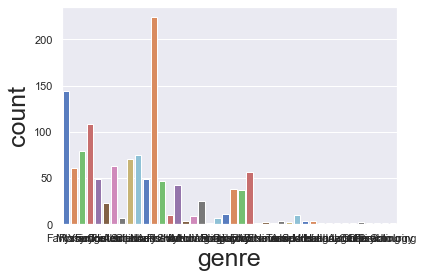

In [432]:
sns.countplot(finaldf.genre, palette="muted")

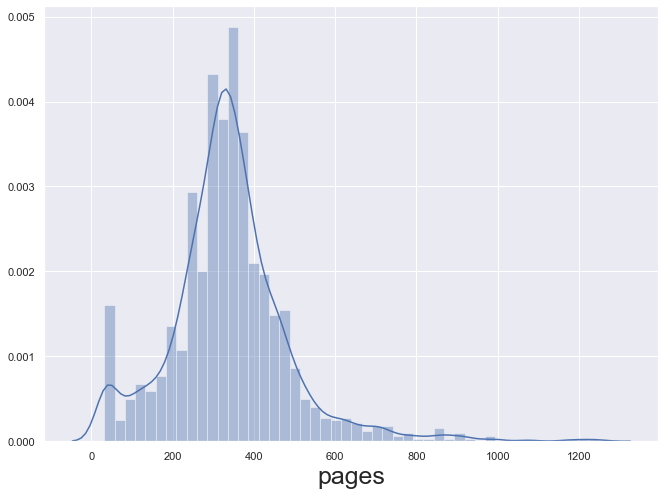

In [467]:
sns.distplot(finaldf['pages'])

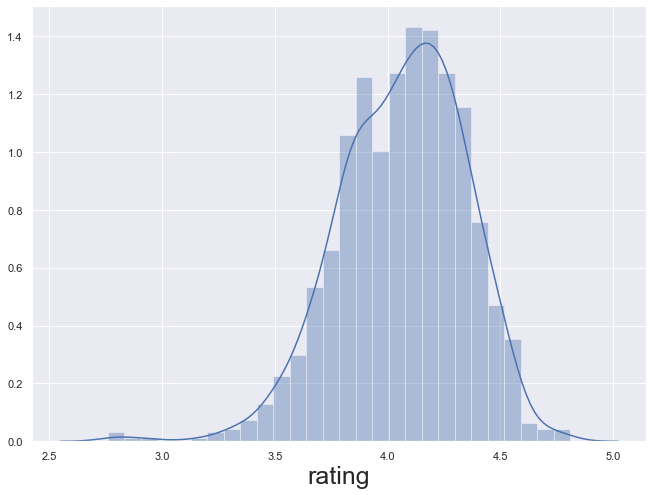

In [462]:
sns.distplot(finaldf['rating'])

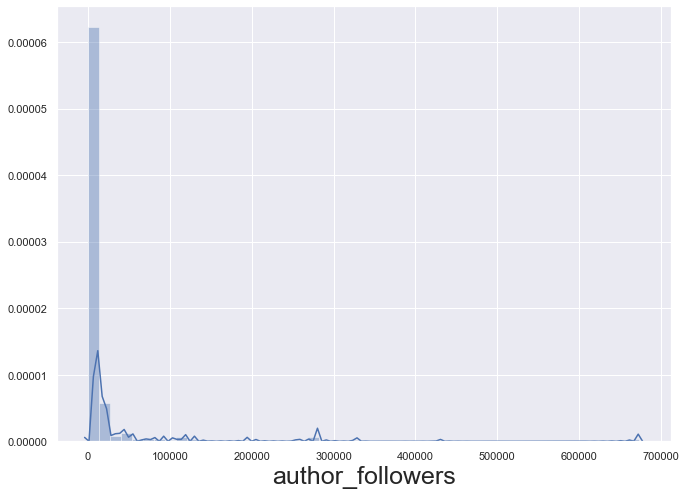

In [463]:
sns.distplot(finaldf['author_followers'])

In [464]:
finaldf['author_followers'] = finaldf['author_followers'].map(lambda x: np.log(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [465]:
finaldf.replace([np.inf, -np.inf], 0, inplace=True)

In [410]:
bestsellers_df_eda = finaldf[finaldf['NYT_Bestseller'] == 1]

In [391]:
sns.set(style='darkgrid')

[Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Fiction'),
 Text(0, 0, 'Young'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Historical'),
 Text(0, 0, 'Contemporary'),
 Text(0, 0, 'Science'),
 Text(0, 0, 'Childrens'),
 Text(0, 0, 'Add'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Media'),
 Text(0, 0, 'Nonfiction'),
 Text(0, 0, 'Politics'),
 Text(0, 0, 'Autobiography'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Food'),
 Text(0, 0, 'Graphic Novels'),
 Text(0, 0, 'Poetry'),
 Text(0, 0, 'Womens'),
 Text(0, 0, 'Business'),
 Text(0, 0, 'Humor'),
 Text(0, 0, 'Short')]

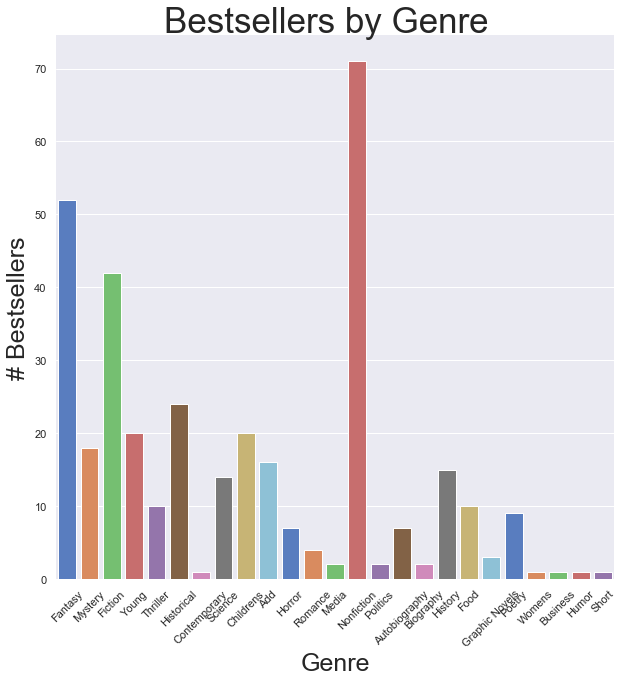

In [433]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine (f, left=True, bottom =True)

fig = sns.countplot(bestsellers_df_eda.genre, palette="muted")
fig.figure.suptitle('Bestsellers by Genre', y=0.92,fontsize = 35)
fig.set(xlabel='Genre', ylabel='# Bestsellers')
plt.rcParams["axes.labelsize"] = 25
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)

[Text(0, 0, 'Algonquin Books'),
 Text(0, 0, 'Houghton Mifflin Harcourt'),
 Text(0, 0, 'Nan A. Talese'),
 Text(0, 0, 'Broadway Books'),
 Text(0, 0, 'CreateSpace Independent Publishing Platform'),
 Text(0, 0, 'Tor Books'),
 Text(0, 0, 'Kensington Publishing Corporation'),
 Text(0, 0, 'Flatiron Books'),
 Text(0, 0, 'Multnomah Books'),
 Text(0, 0, 'Riverhead Books'),
 Text(0, 0, 'Random House'),
 Text(0, 0, 'Knopf Publishing Group'),
 Text(0, 0, 'Clarkson Potter Publishers'),
 Text(0, 0, 'First Second'),
 Text(0, 0, 'Copper Canyon Press'),
 Text(0, 0, 'Talos'),
 Text(0, 0, 'Roaring Brook Press'),
 Text(0, 0, 'Harlequin Teen'),
 Text(0, 0, 'Farrar, Straus and Giroux ')]

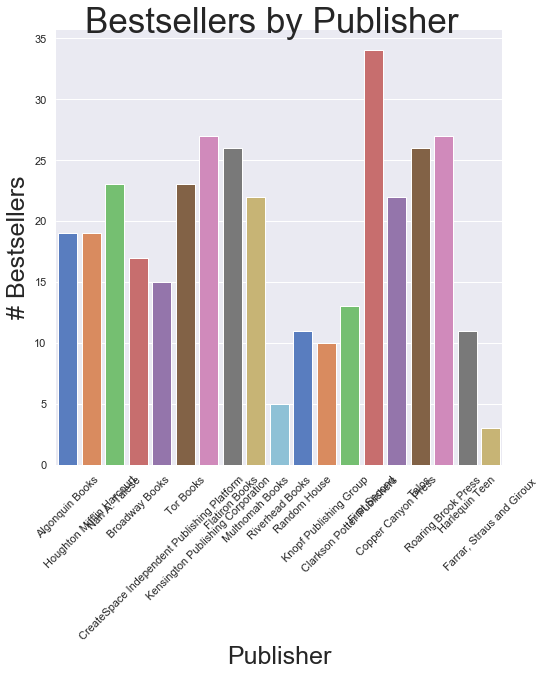

In [460]:
f, ax = plt.subplots(figsize=(8, 8))
sns.despine (f, left=True, bottom =True)

fig = sns.countplot(bestsellers_df_eda.publisher, palette="muted")
fig.figure.suptitle('Bestsellers by Publisher', y=0.92,fontsize = 35)
fig.set(xlabel='Publisher', ylabel='# Bestsellers')
plt.rcParams["axes.labelsize"] = 25
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)


In [461]:
bestsellers_df_eda.publisher.value_counts()

First Second                                   34
Roaring Brook Press                            27
Kensington Publishing Corporation              27
Talos                                          26
Flatiron Books                                 26
Nan A. Talese                                  23
Tor Books                                      23
Copper Canyon Press                            22
Multnomah Books                                22
Algonquin Books                                19
Houghton Mifflin Harcourt                      19
Broadway Books                                 17
CreateSpace Independent Publishing Platform    15
Clarkson Potter Publishers                     13
Harlequin Teen                                 11
Random House                                   11
Knopf Publishing Group                         10
Riverhead Books                                 5
Farrar, Straus and Giroux                       3
Name: publisher, dtype: int64

In [450]:
celeb_df_eda = finaldf[finaldf['celeb_bookclub'] ==1]

In [451]:
celeb_df_eda

,ISBN,author,author_followers,genre,pages,publish_date,publisher,rating,series,title,NYT_Bestseller,celeb_bookclub
10,1524797189,Catherine Steadman,1283,Thriller,342.0,2018-06-05,Algonquin Books,3.60,0,Something in the Water,1,1
113,1616201347,Tayari Jones,9004,Fiction,308.0,2018-02-06,Tor Books,3.97,0,An American Marriage,1,1
160,0735219095,Delia Owens,4673,Fiction,370.0,2018-08-14,Flatiron Books,4.50,0,Where the Crawdads Sing,1,1
161,0399586687,Chanel Cleeton,2672,Historical,361.0,2018-02-06,Flatiron Books,3.95,0,Next Year in Havana,0,1
292,1476740186,Susan Orlean,2928,Nonfiction,336.0,2018-10-16,First Second,3.95,0,The Library Book,1,1
110,0735224293,Celeste Ng,38032,Fiction,338.0,2017-09-12,Tor Books,4.11,0,Little Fires Everywhere,1,1
6,0399590595,Ta-Nehisi Coates,8415,Historical,403.0,2019-09-24,Algonquin Books,4.15,0,The Water Dancer,1,1
10,0525656154,Lara Prescott,457,Historical,349.0,2019-09-03,Algonquin Books,3.75,0,The Secrets We Kept,1,1
120,0812996542,Elizabeth Strout,4785,Fiction,304.0,2019-10-15,Tor Books,4.33,1,"Olive, Again",1,1
154,1524798622,Taylor Jenkins Reid,12873,Historical,355.0,2019-03-05,Flatiron Books,4.22,0,Daisy Jones & The Six,1,1


In [447]:
finaldf.groupby('celeb_bookclub')['NYT_Bestseller'].count()

celeb_bookclub
0    1266
1      13
Name: NYT_Bestseller, dtype: int64

[Text(0, 0, '1')]

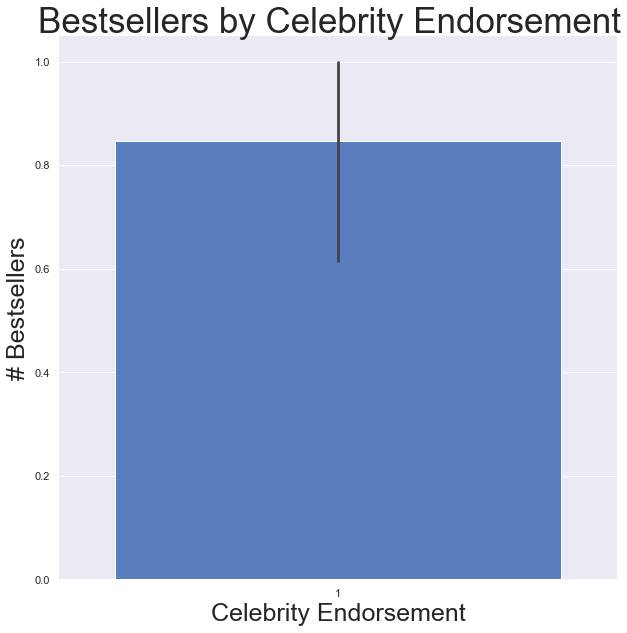

In [452]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine (f, left=True, bottom =True)

fig = sns.barplot(celeb_df_eda.celeb_bookclub, celeb_df_eda.NYT_Bestseller)
fig.figure.suptitle('Bestsellers by Celebrity Endorsement', y=0.92,fontsize = 35)
fig.set(xlabel='Celebrity Endorsement', ylabel='# Bestsellers')
plt.rcParams["axes.labelsize"] = 25
fig.set_xticklabels(fig.get_xticklabels())

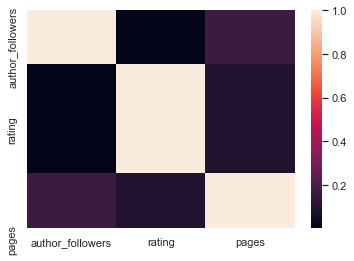

In [408]:
corr = finaldf[['author_followers','rating','pages']].corr()
 
# Heatmap
sns.heatmap(corr)

Text(0.5, 0, 'Genre')

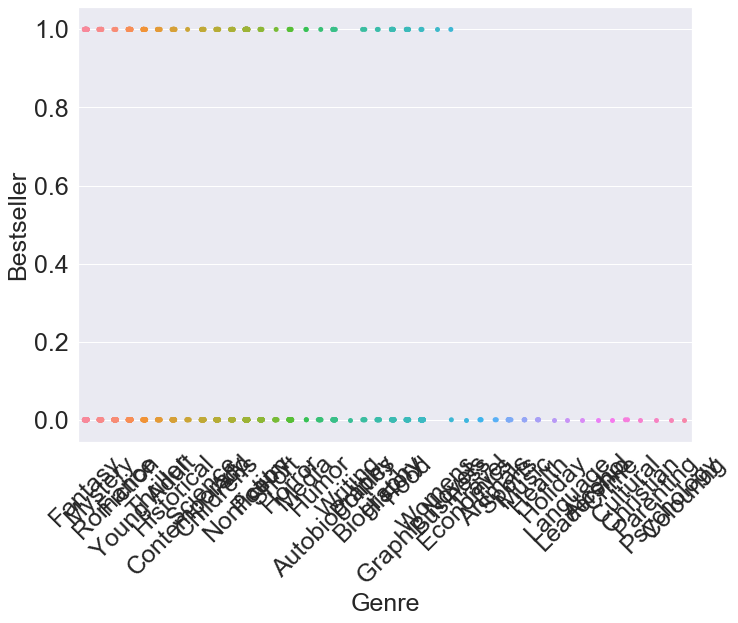

In [455]:
sns.set(rc={'figure.figsize':(11,8)})
sns.stripplot(x=finaldf["genre"], y=finaldf["NYT_Bestseller"], data=df, jitter=True)
plt.xticks(rotation=45, size = 25)
plt.yticks(size =25)
plt.ylabel(ylabel = 'Bestseller', size =25)
plt.xlabel(xlabel = 'Genre', size =25)

[Text(0, 0, '0'), Text(0, 0, '1')]

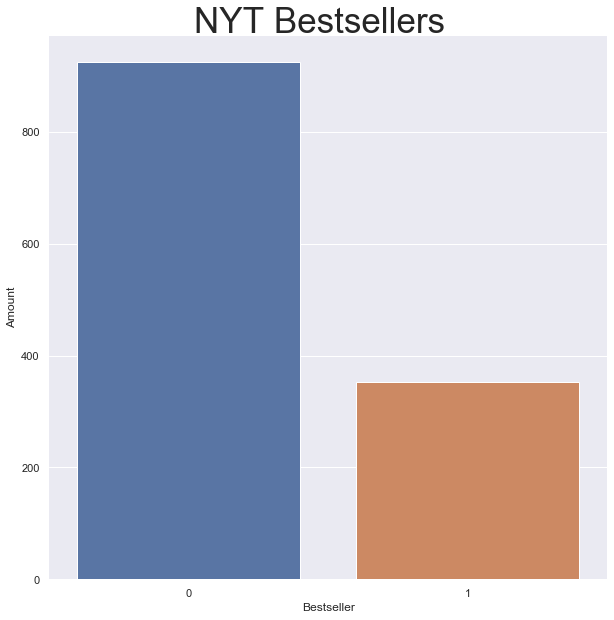

In [459]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine (f, left=True, bottom =True)

fig = sns.countplot(finaldf['NYT_Bestseller'])
fig.figure.suptitle('NYT Bestsellers', y=0.92,fontsize = 35)
fig.set(xlabel='Bestseller', ylabel='Amount')
plt.rcParams["axes.labelsize"] = 25
fig.set_xticklabels(fig.get_xticklabels())

